<a href="https://colab.research.google.com/github/sashwot/DataScience/blob/main/IMAGE_CLASSIFICATION_TO_ENHANCE_SATELLITE_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION PROJECT TO ENHANCE SATELLITE IMAGE

In [1]:
import cv2
import numpy as np
from skimage import exposure, restoration
import matplotlib.pyplot as plt

# Accessing images from WhiteDwarf

## USING NASA API

In [14]:
import requests
'''
API_KEY = "DcBXVUViD6u1P2gxUXkRkw1OfOlPsWRc9mtXBViI"
url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol=1000&api_key={API_KEY}"
urla = f"https://apod.nasa.gov/apod/image/2602/WhiteDwarfShock_VLT_960.jpg"

response = requests.get(urla)
#data = response.json()
print(response)
# Print first image URL

#if "photos" in data and len(data["photos"]) > 0:
    #print(data["photos"][0]["img_src"])
#else:
    #print("No images available")
'''
url = "https://apod.nasa.gov/apod/image/2602/WhiteDwarfShock_VLT_960.jpg"

response = requests.get(url)

if response.status_code == 200:
    with open("WhiteDwarfShock.jpg", "wb") as f:
        f.write(response.content)
    print("Image downloaded successfully!")
else:
    print("Error:", response.status_code)


Image downloaded successfully!


In [ ]:
#image_path = data["photos"][5].get("img_src")


## Downloading the image from URL

In [15]:
from PIL import Image
from io import BytesIO

In [16]:
'''
response = requests.get(image_path)
image = Image.open(BytesIO(response.content))
image = np.array(image)
'''
img = Image.open(BytesIO(response.content)).convert("RGB")
image = np.asarray(img).astype(np.float32) / 255.0



# Ensure image has three channels

In [17]:
#if len(image.shape) == 3 and image.shape[-1] == 4:
    #image = image[:, :, :3]

# Convert to RGB (in case it's not already in correct format)

In [18]:
#image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
rgb = (image * 255).astype(np.uint8)
bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
yuv = cv2.cvtColor(bgr, cv2.COLOR_BGR2YUV).astype(np.float32)

Y = yuv[..., 0]
p1, p99 = np.percentile(Y, (1, 99))
Y = np.clip((Y - p1) / (p99 - p1), 0, 1)

gamma = 0.9
Y = np.power(Y, gamma) * 255.0

yuv[..., 0] = Y
out1 = cv2.cvtColor(yuv.astype(np.uint8), cv2.COLOR_YUV2BGR)
out1 = cv2.cvtColor(out1, cv2.COLOR_BGR2RGB)
Image.fromarray(out1).save("v1_faint_detail.png")

In [19]:
rgb = (image * 255).astype(np.uint8)
bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

L, A, B = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
L2 = clahe.apply(L)

lab2 = cv2.merge([L2, A, B])
out2 = cv2.cvtColor(lab2, cv2.COLOR_LAB2BGR)
out2 = cv2.cvtColor(out2, cv2.COLOR_BGR2RGB)
Image.fromarray(out2).save("v2_local_contrast_CLAHE.png")

In [20]:
rgb = (image * 255).astype(np.uint8)
bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)

den = cv2.fastNlMeansDenoisingColored(bgr, None, 5, 5, 7, 21)

blur = cv2.GaussianBlur(den, (0,0), 1.0)
sharp = cv2.addWeighted(den, 1.15, blur, -0.15, 0)

out3 = cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)
Image.fromarray(out3).save("v3_clean_sharp.png")

In [21]:
rgb = (image * 255).astype(np.uint8)
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV).astype(np.float32)

h, s, v = cv2.split(hsv)

# Boost saturation more in midtones than highlights
boost = 1.20
mask = (v / 255.0)
s = s * (1 + (boost - 1) * (1 - mask))  # less boost when bright
s = np.clip(s, 0, 255)

hsv2 = cv2.merge([h, s, v]).astype(np.uint8)
out4 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2RGB)
Image.fromarray(out4).save("v4_color_pop.png")

# Contrast Enhancement using Adaptive Histogram Equalization

In [ ]:
'''
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
contrast_enhanced = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
'''

# Noise Reduction using Non-Local Means Denoising

In [ ]:
'''
denoised = cv2.fastNlMeansDenoisingColored(contrast_enhanced, None, 10, 10, 7, 21)
'''

# Sharpening the Image

In [ ]:
'''
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(denoised, -1, kernel)
'''

# Histogram Stretching for better contrast

In [ ]:
'''
stretched = exposure.rescale_intensity(sharpened, in_range='image', out_range=(0, 255))
'''

# Display the results

In [22]:
'''
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
#ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
#ax[1].imshow(cv2.cvtColor(contrast_enhanced, cv2.COLOR_BGR2RGB))
ax[1].set_title('Contrast Enhanced')
#ax[2].imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))
ax[2].set_title('Denoised Image')
# Convert the 'stretched' image to uint8 before displaying it
#ax[3].imshow(cv2.cvtColor(stretched.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[3].imshow(out3)
ax[3].set_title('Sharpened & Enhanced')
for a in ax:
  a.axis('off')
plt.show()
'''

"\nfig, ax = plt.subplots(1, 4, figsize=(20, 5))\n#ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))\nax[0].set_title('Original Image')\n#ax[1].imshow(cv2.cvtColor(contrast_enhanced, cv2.COLOR_BGR2RGB))\nax[1].set_title('Contrast Enhanced')\n#ax[2].imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))\nax[2].set_title('Denoised Image')\n# Convert the 'stretched' image to uint8 before displaying it\n#ax[3].imshow(cv2.cvtColor(stretched.astype(np.uint8), cv2.COLOR_BGR2RGB))\nax[3].imshow(out3)\nax[3].set_title('Sharpened & Enhanced')\nfor a in ax:\n  a.axis('off')\nplt.show()\n"

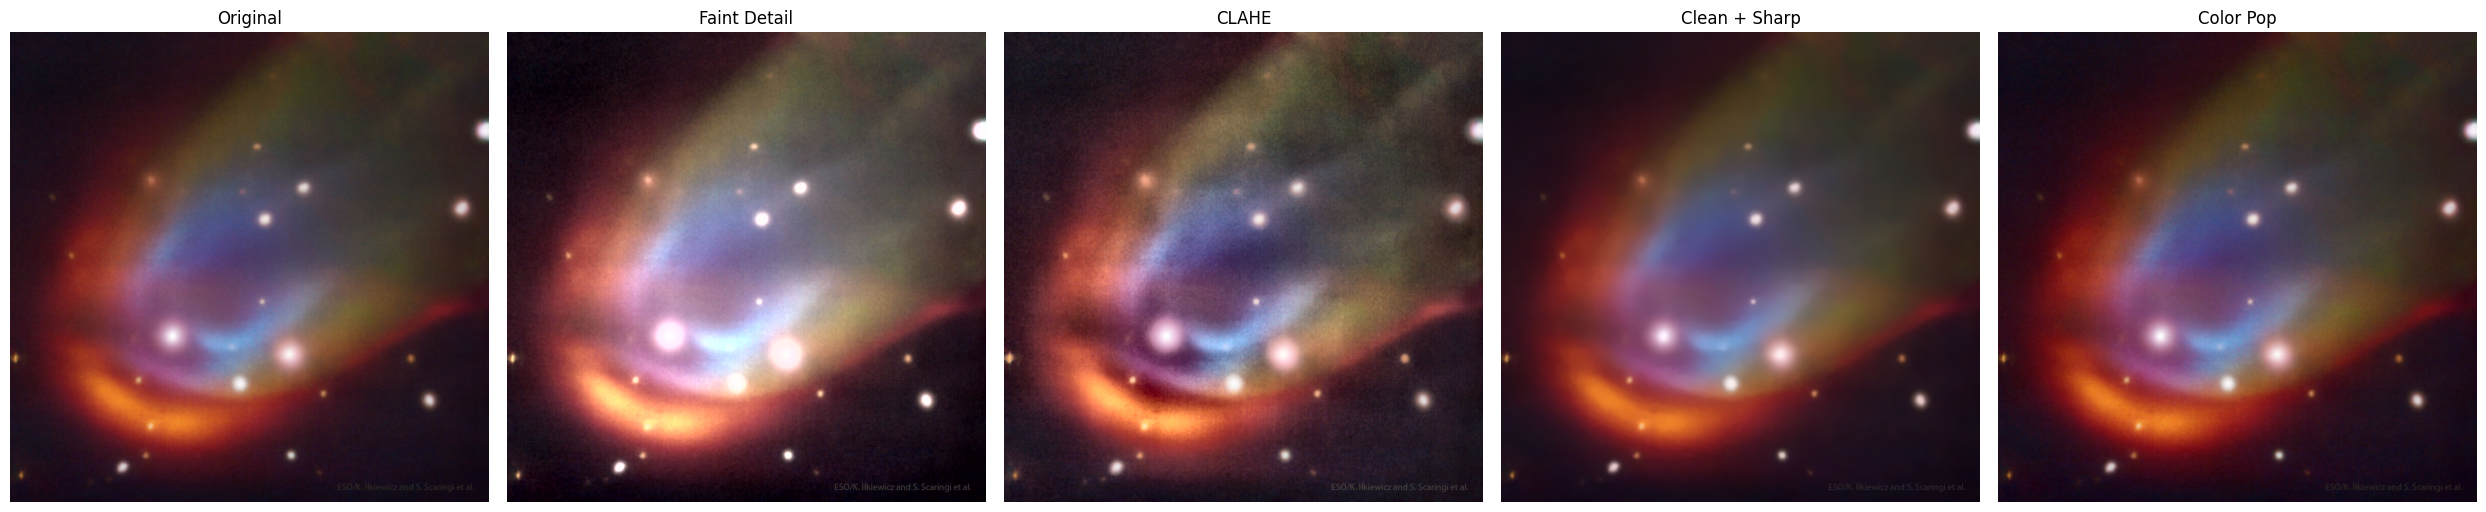

In [24]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(out1)
ax[1].set_title('Faint Detail')

ax[2].imshow(out2)
ax[2].set_title('CLAHE')

ax[3].imshow(out3)
ax[3].set_title('Clean + Sharp')

ax[4].imshow(out4)
ax[4].set_title('Color Pop')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()